### Импорт

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import warnings

### Загрузка датасета

In [2]:
df = pd.read_csv("train.csv", low_memory=False)

### Исследование датасета

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.tail()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard
99999,0x25fed,CUS_0x942c,August,Nicks,25,078-73-5990,Mechanic,39628.99_,3359.415833,4,...,Good,502.38,34.192463,31 Years and 10 Months,No,35.104023,167.1638651610451,!@9#%8,393.6736955618808,Poor


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [6]:
df.shape

(100000, 28)

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


### Удаляем ненужные столбцы

In [8]:
df.drop(['ID','Month','SSN','Name'],axis=1,inplace=True)

### Проверка на содержание символа _

In [9]:
contains_underscore = df.apply(lambda x: x.astype(str).str.contains('_')).sum()
print("\nСтроки с символом '_':\n", contains_underscore)


Строки с символом '_':
 Customer_ID                 100000
Age                           4939
Occupation                   13294
Annual_Income                 6980
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                   4785
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment        2744
Changed_Credit_Limit          2091
Num_Credit_Inquiries             0
Credit_Mix                   20195
Outstanding_Debt              1009
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       4305
Payment_Behaviour            92400
Monthly_Balance                  9
Credit_Score                     0
dtype: int64


### Замена _ на пустое значение (я заменила только в тех столбцах, в которых это необходимо)

In [10]:
df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Mix']] = df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Mix']].applymap(lambda x: '' if '_' in str(x) else x)

C:\Users\user\AppData\Local\Temp\ipykernel_21104\3579886201.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Mix']] = df[['Age', 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Mix']].applymap(lambda x: '' if '_' in str(x) else x)


In [11]:
contains_underscore = df.apply(lambda x: x.astype(str).str.contains('_')).sum()
print("\nСтроки с символом '_':\n", contains_underscore)


Строки с символом '_':
 Customer_ID                 100000
Age                              0
Occupation                   13294
Annual_Income                    0
Monthly_Inhand_Salary            0
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Type_of_Loan                     0
Delay_from_due_date              0
Num_of_Delayed_Payment           0
Changed_Credit_Limit             0
Num_Credit_Inquiries             0
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age               0
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly          0
Payment_Behaviour            92400
Monthly_Balance                  0
Credit_Score                     0
dtype: int64


### Переводим на числовой тип числовые значения (с object на float64)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    92998 non-null   object 
 12  Changed_Credit_Limit      100000 non-null  object 
 13  Num_Credit_Inquiries      98035 non-null   fl

In [13]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')
df['Num_of_Loan'] = pd.to_numeric(df['Num_of_Loan'], errors='coerce')
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Age                       95061 non-null   float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             93020 non-null   float64
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    90254 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

### Проверка на наличие отрицательных чисел и замена их на медиану столбца

In [14]:
numeric_columns = df.select_dtypes(include=['number'])
negative_counts = numeric_columns.lt(0).sum()

print("Количество отрицательных значений в каждом столбце:")
print(negative_counts)

Количество отрицательных значений в каждом столбце:
Age                          886
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts             21
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 3876
Delay_from_due_date          591
Num_of_Delayed_Payment       622
Changed_Credit_Limit        1586
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Total_EMI_per_month            0
Amount_invested_monthly        0
Monthly_Balance                0
dtype: int64


In [15]:
df[numeric_columns.columns] = numeric_columns.apply(lambda x: x.mask(x < 0, x.median(), axis=0))


numeric_columns = df.select_dtypes(include=['number'])
negative_counts = numeric_columns.lt(0).sum()
print(negative_counts)

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64


### Проверка столбцов с пустыми значениями и их замена на медиану (или же на "Unknown" для строковых типов данных)

In [16]:
df.isnull().sum()

Customer_ID                     0
Age                          4939
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [17]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Annual_Income'].fillna(df['Annual_Income'].median(), inplace=True)
df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].median(), inplace=True)
df['Num_of_Loan'].fillna(df['Num_of_Loan'].median(), inplace=True)
df['Type_of_Loan'].fillna('Unknown', inplace=True)
df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].median(), inplace=True)
df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].median(), inplace=True)
df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].median(), inplace=True)
df['Outstanding_Debt'].fillna(df['Outstanding_Debt'].median(), inplace=True)
df['Credit_History_Age'].fillna('Unknown', inplace=True)
df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median(), inplace=True)
df['Monthly_Balance'].fillna(df['Monthly_Balance'].median(), inplace=True)

In [18]:
df.isnull().sum()

Customer_ID                 0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

### Преобразование строковых данных в числовые

In [19]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Occupation'] = labelencoder.fit_transform(df['Occupation'])
df['Type_of_Loan'] = labelencoder.fit_transform(df['Type_of_Loan'])
df['Payment_Behaviour'] = labelencoder.fit_transform(df['Payment_Behaviour'])
df['Credit_Score'] = labelencoder.fit_transform(df['Credit_Score'])

### Корреляция между данными

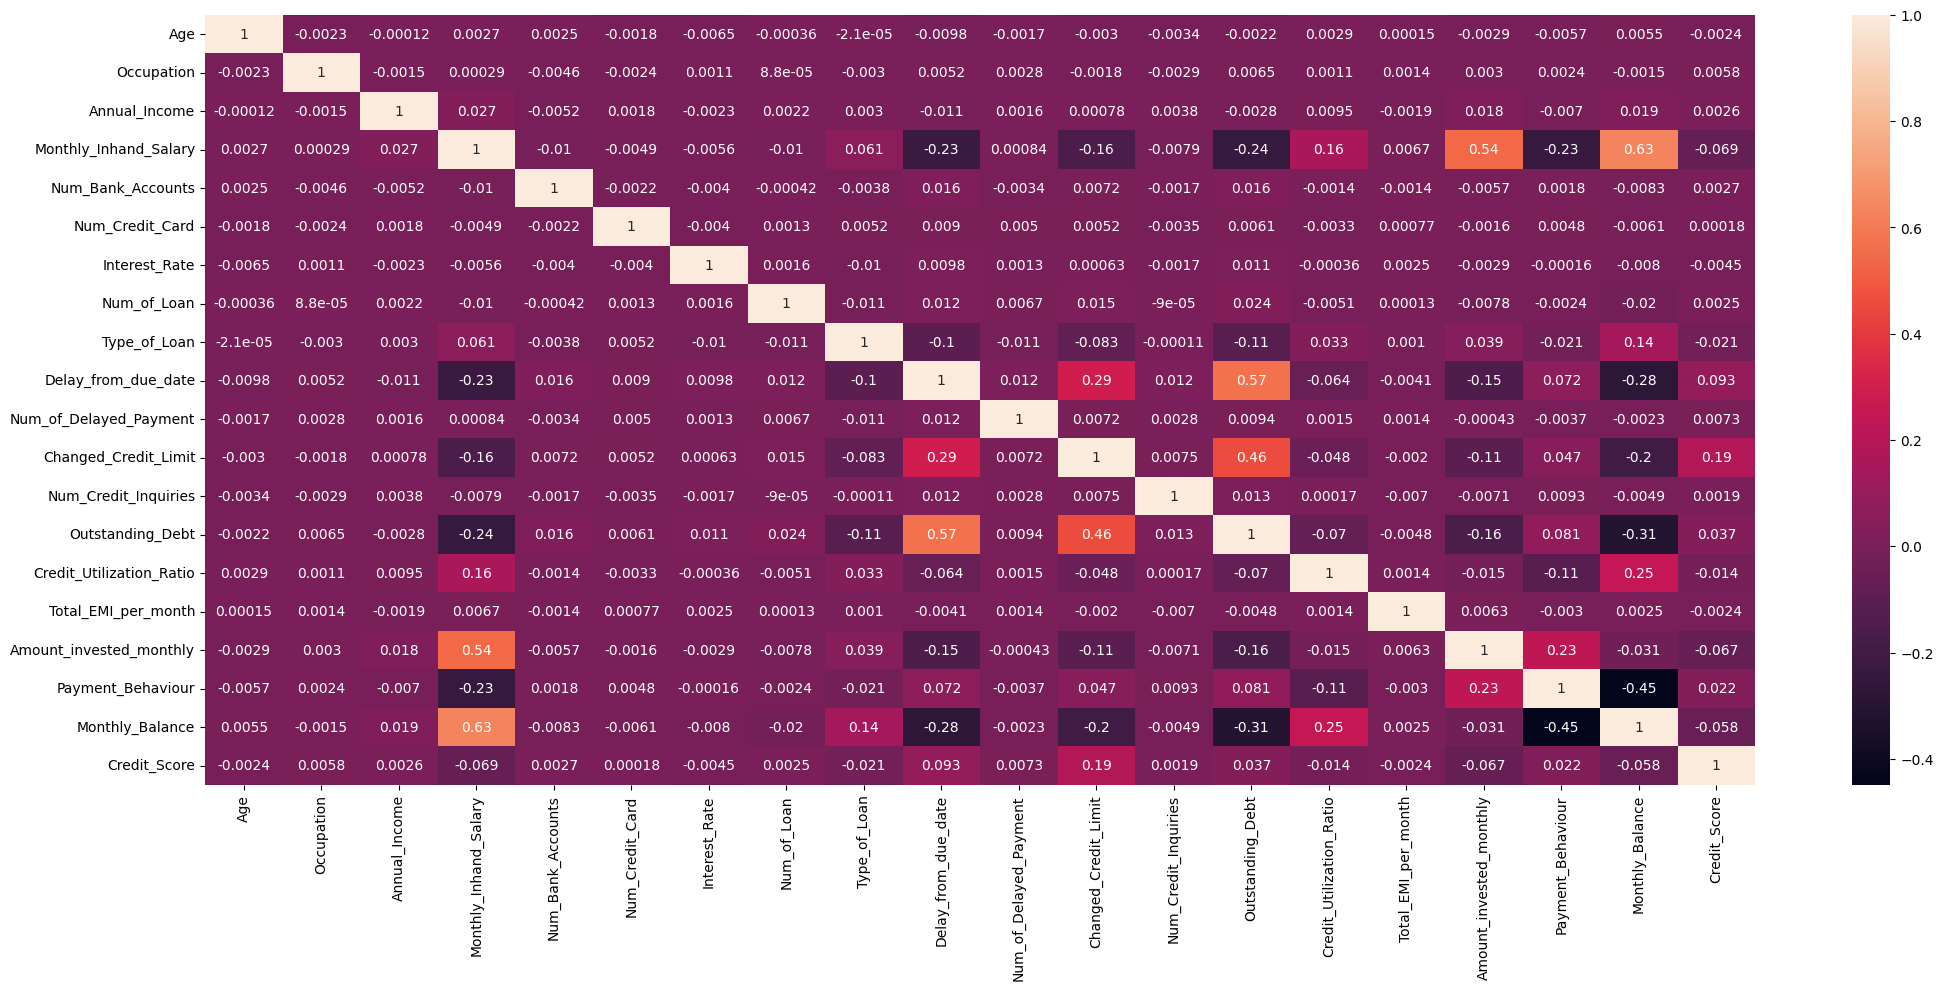

In [20]:
numeric_columns = df.select_dtypes(include=['number'])
plt.figure(figsize = (25,10))
a = numeric_columns.corr()
sns.heatmap(a,annot = True);

### Корреляция по отношению к нашему Credit_Score(target)

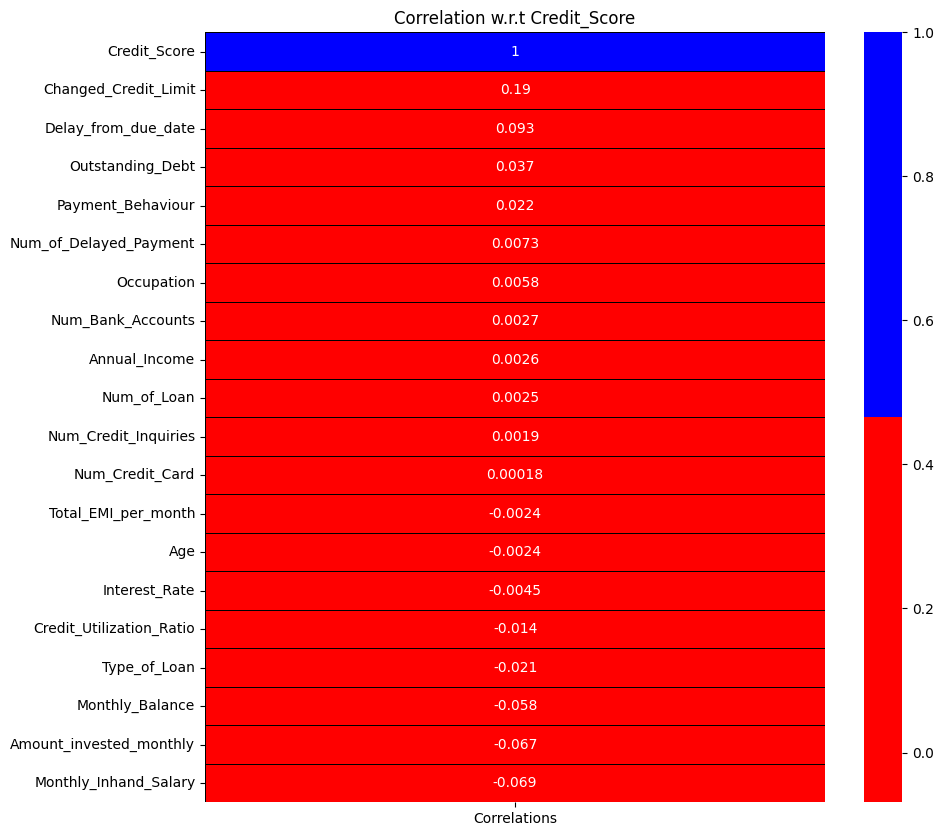

In [21]:
colors = ['red', 'blue']

corr = numeric_columns.corrwith(df['Credit_Score']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (10,10))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Credit_Score');

# Обучение модели логистической регресси и предсказание на тестовом наборе

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
X = df[['Monthly_Inhand_Salary', 'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']].values
y = df['Credit_Score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42, shuffle=True)

#### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(max_iter=3000,C=10) 
classifier_lr.fit(X_train, y_train)
prediction = classifier_lr.predict(X_test)
print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))

print(classification_report(y_test,classifier_lr.predict(X_test)))

Accuracy: 59.04%
              precision    recall  f1-score   support

           0       0.49      0.17      0.26      8963
           1       0.63      0.43      0.51     14461
           2       0.59      0.82      0.68     26576

    accuracy                           0.59     50000
   macro avg       0.57      0.47      0.48     50000
weighted avg       0.58      0.59      0.56     50000



#### Decision Tree Classifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(max_depth = 4,min_samples_leaf = 3)
classifier_dt.fit(X_train, y_train)
prediction = classifier_dt.predict(X_test)
print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))

print(classification_report(y_test,classifier_dt.predict(X_test)))

Accuracy: 64.97%
              precision    recall  f1-score   support

           0       0.51      0.36      0.42      8963
           1       0.71      0.59      0.65     14461
           2       0.66      0.78      0.71     26576

    accuracy                           0.65     50000
   macro avg       0.62      0.58      0.59     50000
weighted avg       0.64      0.65      0.64     50000



#### Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4)
classifier_rf.fit(X_train, y_train)
prediction = classifier_rf.predict(X_test)
print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))

print(classification_report(y_test,classifier_rf.predict(X_test)))

Accuracy: 63.02%
              precision    recall  f1-score   support

           0       0.61      0.02      0.03      8963
           1       0.68      0.63      0.65     14461
           2       0.61      0.84      0.71     26576

    accuracy                           0.63     50000
   macro avg       0.63      0.49      0.46     50000
weighted avg       0.63      0.63      0.57     50000



## Вывод: 
## Я не совсем поняла, почему даже с учетом того, что я провела анализ корреляции и отобрала нужных 10 столбцов, процент обучаемости такой низкий...
## Но в целом, думаю стоило еще немного поработать над датасетом, но времени хватило только на это (лучший результат дало Дерево Решений при параметрах на глубину 4 и количество образцов в листе 3)